## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/vrhughes/knn

Cloning into 'knn'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 90 (delta 37), reused 14 (delta 14), pack-reused 39 (from 1)
Receiving objects: 100% (90/90), 15.15 MiB | 15.74 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [3]:
# Question 1 Part 1
cars = pd.read_csv('./knn/data/USA_cars_datasets.csv', low_memory=False)
cars = cars[['price', 'year', 'mileage']]
price = cars['price'] # variable vector
year = cars['year']
mileage = cars['mileage']
# looking at values, making sure not overwhelming amount of bad data
print(price.value_counts(), '\n')
print(mileage.value_counts(), '\n')
print(year.value_counts(), '\n')
print(cars.shape, '\n')


price
0        43
16500    26
13900    21
15500    19
15000    19
         ..
12560     1
11760     1
7340      1
6530      1
30100     1
Name: count, Length: 790, dtype: int64 

mileage
1        11
0         6
31727     2
33808     2
21774     2
         ..
90685     1
54141     1
82240     1
66167     1
31371     1
Name: count, Length: 2439, dtype: int64 

year
2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2007      6
2005      6
2001      5
1998      4
2000      4
2002      2
1994      2
1997      2
1996      2
1973      1
1999      1
1984      1
1995      1
1993      1
Name: count, dtype: int64 

(2499, 3) 



In [13]:
# adding maxmin func from notes
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

In [5]:
# Question 1 Part 2
feature = cars.loc[:, ['year', 'mileage']] # feature matrix
feature = feature.apply(maxmin)
feature.head()
feature.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [6]:
# Question 1 Part 3: splitting data
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.2, random_state=100)

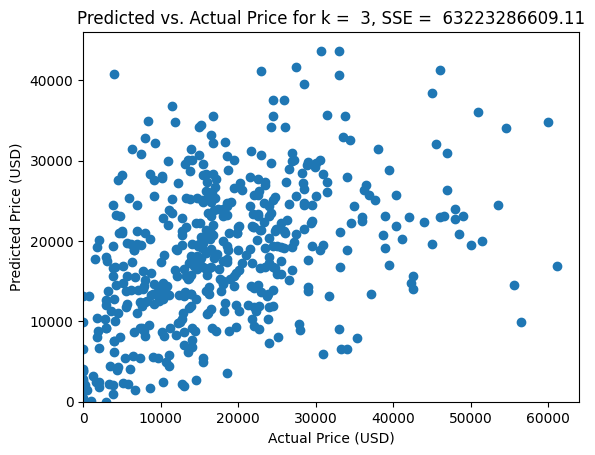

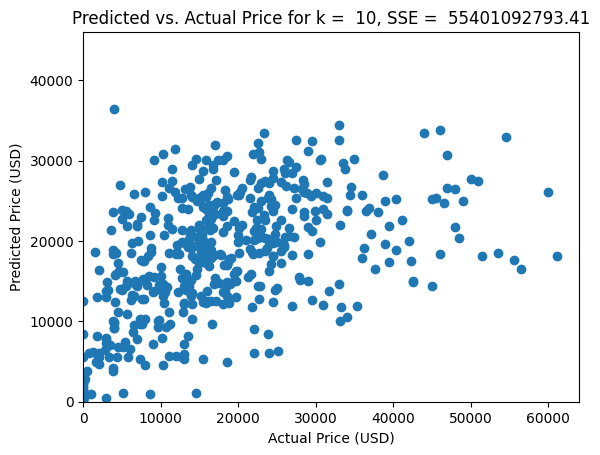

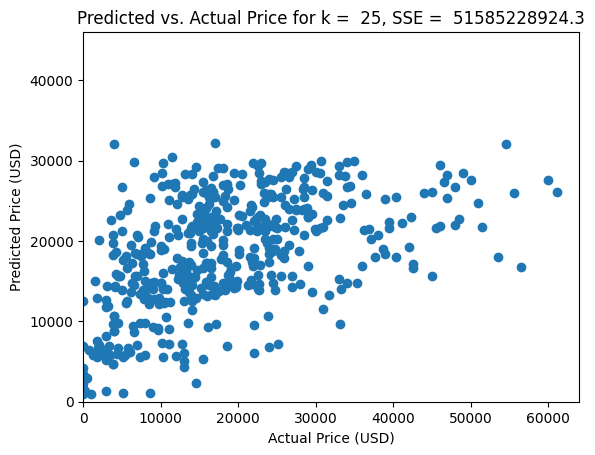

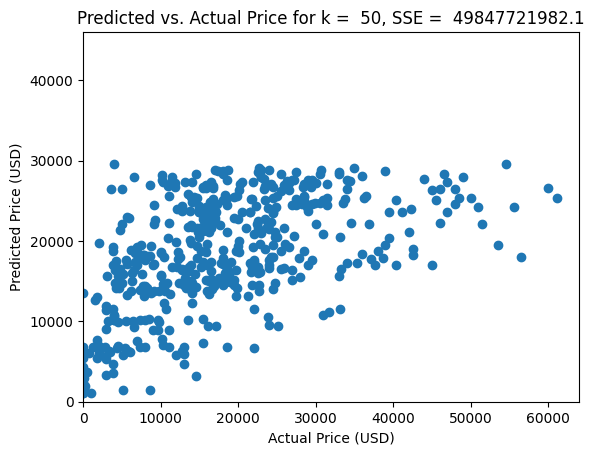

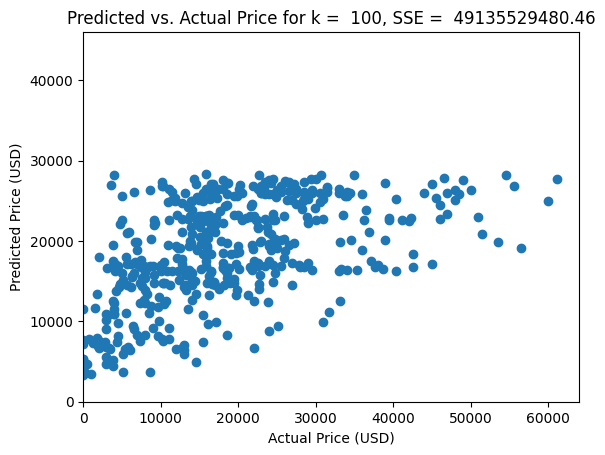

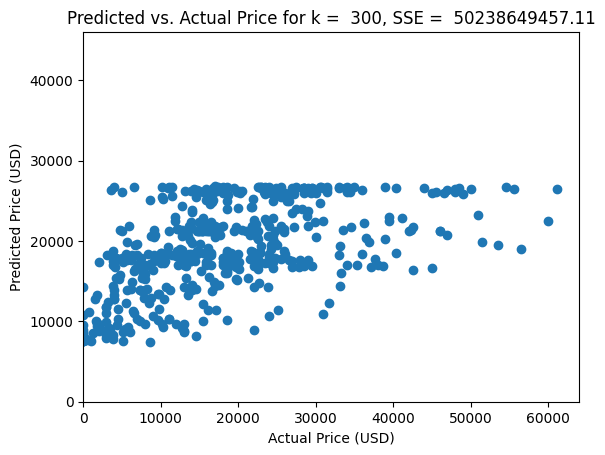

The optimal val of k is:  [5]


In [15]:
# Question 1 Part 4-5: Use the  kNN algorithm and the training data to predict price using year and mileage for the test set for  k=3,10,25,50,100,300
# For each value of  k, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value.
# What patterns do you notice as you increase  k?

k_bar = [3, 10, 25, 50, 100, 300]
SSE = np.zeros(len(k_bar))
SSE_on_train = np.zeros(len(k_bar))

for k in range(len(k_bar)):
    model = KNeighborsRegressor(n_neighbors=k_bar[k]) # if pulling list[index] DO NOT ADD 1
    fitted = model.fit(X_train, y_train)
    y_hat = fitted.predict(X_test) # predict vals for test set
    SSE[k] = np.sum( (y_hat-y_test)**2 ) # save computed SEE for test set

    fig, axes = plt.subplots()
    plt.scatter(y_test,y_hat)

    plt.xlabel('Actual Price (USD)')
    plt.ylabel('Predicted Price (USD)')
    rounded_SSE = round(SSE[k],2) # Rounding SSE to the hundredths place
    plt.title('Predicted vs. Actual Price for k =  ' + str(k_bar[k]) + ', SSE =  ' + str(rounded_SSE))
    plt.xlim(0, 64000)
    plt.ylim(0, 46000)
    plt.show()

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = min_index[0]+1
print('The optimal val of k is: ', k_star)

# huzzah, now we gotta make some graphs !!


The optimal val of k is:  [77]


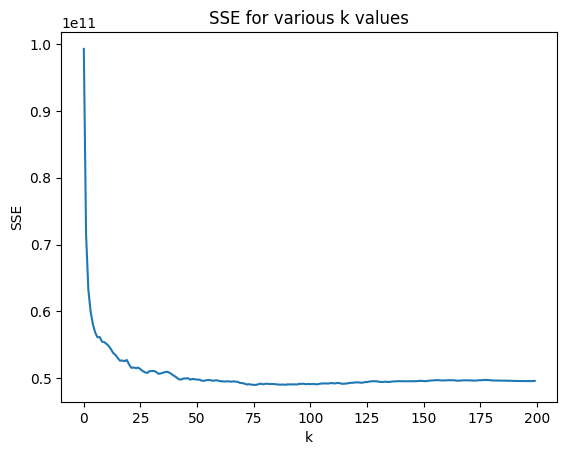

In [17]:
# Question 1 Part 5
# plotting SSE over k values
ks = 200 # Number of k's to try
SSE2 = np.zeros(ks) # We'll store the SSE here

for k in range(ks):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted = model.fit(X_train,y_train)
    y_hat = fitted.predict(X_test) # predict values for test set
    SSE2[k] = np.sum( (y_test-y_hat)**2 ) # save the computed SSE for test set

SSE2_min = np.min(SSE2)
min_index = np.where(SSE2 == SSE2_min)
k_star = min_index[0]+1
print('The optimal val of k is: ', k_star)

plt.plot(np.arange(0, ks), SSE2) # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE for various k values')
plt.show()

Question 1 Part 6: Describe what happened in the plots of predicted versus actual prices as  k  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

As k increased the predicted prices began to thin into a band (about 8000 to 28000 on the y). This is an example of overfitting because the data is clearly being crushed to the point where clear divisions can be seen (for instance it doesn't make sense that at 38001 exactly there is no data for k=300, or the fact that there are no outliers on the y). The optimal value of k is 77, and you can notice from the graph in part 5 that once you pass k=77 the SSE really doesn't change much. Before k = 77 there are definitely larger error values which is due to the data being underfitted, or having too much leeway which makes it messier and reduces precision.

---


**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [16]:
# Question 2 Part 1
heart = pd.read_csv('./knn/data/heart_failure_clinical_records_dataset.csv', low_memory=False)
heart = heart.drop(columns=['time'], axis=1)

# shape
print(heart.shape, '\n')

# Checking for any NANs and nulls in the daraframe (there are none):
print(heart.isna().sum(), '\n')
print(heart.isnull().sum(), '\n')

heart.describe()

# The dataframe is now a 299 by 12 since we dropped the 13th column 'time', 299 observations and 12 variables

(299, 12) 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64 



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [17]:
# Question 2 Part 2
corr = heart.corr()
corr

# The variables strongly associated with a death event are 'serum_creatinine', 'ejection_fraction', and 'age'.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [18]:
# Question 2 Part 3: For the dummy variables anaemia, diabetes, high_blood_pressure, sex, and smoking, compute a summary
# table of DEATH_EVENT grouped by the variable. For which variables does a higher proportion of the population die when
# the variable takes the value 1 rather than 0?

dummy_vars = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

for i in dummy_vars:
    print(heart.loc[:,[i,'DEATH_EVENT']].groupby(i).describe(), '\n')

# For 'anaemia' and 'high_blood_pressure' a higher proportion of the population dies when the variable takes the
# value 1 instead of 0 (seen when comparing the means).


        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0 

         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0 

                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  

In [42]:
# Question 2 Part 4 & 5: On the basis of your answers from 2 and 3, build a matrix  X  of the variables you think are
# most predictive of a death, and a variable  y  equal to DEATH_EVENT. Maxmin normalize X.

X = heart.loc[:,['age', 'anaemia', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine']]
y = heart['DEATH_EVENT']

# normalizing X
X = X.apply(maxmin)
X.head()

,age,anaemia,ejection_fraction,high_blood_pressure,serum_creatinine
0,0.636364,0.0,0.090909,1.0,0.157303
1,0.272727,0.0,0.363636,0.0,0.067416
2,0.454545,0.0,0.090909,0.0,0.089888
3,0.181818,1.0,0.090909,0.0,0.157303
4,0.454545,1.0,0.090909,0.0,0.247191


In [43]:
# Question 2 Part 6: Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test
# split for the whole question, so that you're comparing apples to apples in the questions below.)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


The optimal val of k is:  [8]


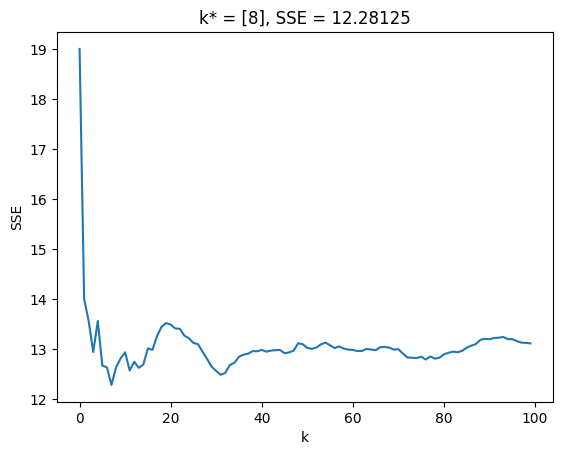

In [44]:
# Question 2 Part 7: Determine the optimal number of neighbors for a  kNN regression for the variables you selected.
ks = 100 # Number of k's to try
SSE2 = np.zeros(ks) # We'll store the SSE here

for k in range(ks):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted = model.fit(X_train,y_train)
    y_hat = fitted.predict(X_test) # predict values for test set
    SSE2[k] = np.sum( (y_test-y_hat)**2 ) # save the computed SSE for test set

SSE2_min = np.min(SSE2)
min_index = np.where(SSE2 == SSE2_min)
k_star = min_index[0]+1
print('The optimal val of k is: ', k_star)

plt.plot(np.arange(0, ks), SSE2) # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('k* = ' + str(k_star) + ', SSE = ' + str(SSE2_min))
plt.show()

---

The optimal k value is 8!

---

Question 2 Part 8: OK, do steps 5 through 7 again, but use all of the variables (except time). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict DEATH_EVENTs? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [45]:
# making second X table
X2 = heart.loc[:,['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
y2 = heart['DEATH_EVENT']

# normalizing X
X2 = X2.apply(maxmin)
X2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [46]:
# Splitting new data, all of heart data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=100)


The optimal val of k is: now  [19]


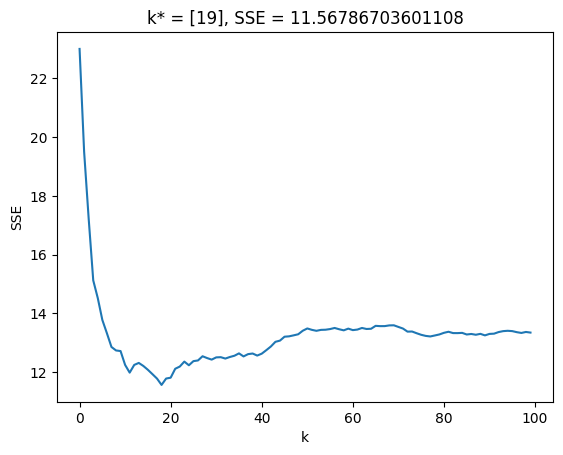

In [47]:
# Second time
ks = 100 # Number of k's to try
SSE2 = np.zeros(ks) # We'll store the SSE here

for k in range(ks):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted = model.fit(X_train,y_train)
    y_hat = fitted.predict(X_test) # predict values for test set
    SSE2[k] = np.sum( (y_test-y_hat)**2 ) # save the computed SSE for test set

SSE2_min = np.min(SSE2)
min_index = np.where(SSE2 == SSE2_min)
k_star = min_index[0]+1
print('The optimal val of k is: now ', k_star)

plt.plot(np.arange(0, ks), SSE2) # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('k* = ' + str(k_star) + ', SSE = ' + str(SSE2_min))
plt.show()

When all the variables were used the optimal k (k*) increased from 8 to 19 and the SSE minimum decreased from 12.3 to 11.6. The second model is more complex, but personally I don't think it really does much for the SSE so I would probably go with the simpler model and use k = 8. With k = 8 your SSE is relatively similar. If I really needed accuracy I would suck it up and use the more complicated one.

In [ ]:
# just for fun
# making second X table
X2 = heart.loc[:,['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
y2 = heart['DEATH_EVENT']

# normalizing X
X2 = X2.apply(maxmin)
X2.head()

# Splitting new data, all of heart data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=100)